## (a) Prepare code and dataset

### Download source code

In [1]:
!git clone https://github.com/princeton-vl/pytorch_stacked_hourglass.git

Cloning into 'pytorch_stacked_hourglass'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 96 (delta 0), reused 1 (delta 0), pack-reused 93
Unpacking objects: 100% (96/96), done.


### Download MPII dataset

In [2]:
!wget https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1.tar.gz

--2021-11-30 01:46:53--  https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1.tar.gz
Resolving datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)... 139.19.206.177
Connecting to datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)|139.19.206.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12088943206 (11G) [application/x-gzip]
Saving to: ‘mpii_human_pose_v1.tar.gz’

mpii_human_pose_v1. 100%[===================>]  11.26G  3.05MB/s    in 34m 30s 

2021-11-30 02:21:25 (5.57 MB/s) - ‘mpii_human_pose_v1.tar.gz’ saved [12088943206/12088943206]



In [3]:
from __future__ import print_function

import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import cm
import torchvision
import torchvision.datasets as datasets
import cv2

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!tar -xvzf mpii_human_pose_v1.tar.gz -C pytorch_stacked_hourglass/data/MPII/

Streaming output truncated to the last 5000 lines.
./images/019279044.jpg
./images/068025069.jpg
./images/043439489.jpg
./images/065199085.jpg
./images/043180510.jpg
./images/077936327.jpg
./images/032166247.jpg
./images/085835606.jpg
./images/028663685.jpg
./images/085061606.jpg
./images/045571938.jpg
./images/052659494.jpg
./images/040132544.jpg
./images/041967229.jpg
./images/070550266.jpg
./images/006644163.jpg
./images/004278327.jpg
./images/061707653.jpg
./images/046332890.jpg
./images/038161650.jpg
./images/014551548.jpg
./images/012610270.jpg
./images/030097552.jpg
./images/090687283.jpg
./images/092028594.jpg
./images/020276921.jpg
./images/086201772.jpg
./images/081240248.jpg
./images/045623651.jpg
./images/002182340.jpg
./images/009557537.jpg
./images/039847876.jpg
./images/001289747.jpg
./images/062442493.jpg
./images/020601740.jpg
./images/023538326.jpg
./images/087342324.jpg
./images/061328639.jpg
./images/045247005.jpg
./images/043498418.jpg
./images/087985677.jpg
./imag

### Visualize some images in MPII dataset

In [6]:
# TODO

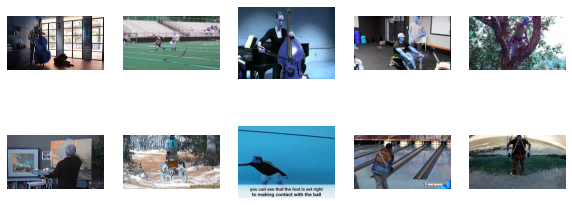

In [7]:
import random, os
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

fig, axs = plt.subplots(2, 5, figsize = (10, 4))
plt.gray()

path = r'/content/pytorch_stacked_hourglass/data/MPII/images'
for i, ax in enumerate(axs.flat):
  random_filename = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path, x))])
  img = cv2.imread(path+'/'+random_filename)
  ax.imshow(img, cmap=cm.gray_r)
  ax.axis('off')

## (c) Train the network

Train with one stack (1HG). Please keep your terminal output in order to get full credit.

In [8]:
#Training by changing 'nstack’: 2,‘train_iters’: 100
%cd pytorch_stacked_hourglass/
!python train.py -e test_run_001 --max_iters 4

/content/pytorch_stacked_hourglass
loading data...
Done (t=5.84s)
epoch:  0
start train test_run_001
100% 100/100 [01:56<00:00,  1.16s/it]
start valid test_run_001
100% 10/10 [00:09<00:00,  1.01it/s]
=> save checkpoint
epoch:  1
start train test_run_001
100% 100/100 [01:53<00:00,  1.13s/it]
start valid test_run_001
100% 10/10 [00:09<00:00,  1.01it/s]
=> save checkpoint
epoch:  2
start train test_run_001
100% 100/100 [01:53<00:00,  1.14s/it]
start valid test_run_001
100% 10/10 [00:09<00:00,  1.00it/s]
=> save checkpoint
epoch:  3
start train test_run_001
100% 100/100 [01:53<00:00,  1.13s/it]
start valid test_run_001
100% 10/10 [00:09<00:00,  1.04it/s]
=> save checkpoint
epoch:  4
start train test_run_001
100% 100/100 [01:53<00:00,  1.14s/it]
start valid test_run_001
100% 10/10 [00:10<00:00,  1.08s/it]
=> save checkpoint
epoch:  5
start train test_run_001
100% 100/100 [01:54<00:00,  1.14s/it]
start valid test_run_001
100% 10/10 [00:09<00:00,  1.00it/s]
=> save checkpoint
epoch:  6
start 

Draw your 1HG loss plot from log file.

In [9]:
# TODO
import regex as re
loss_val={}
i = 0
with open("/content/pytorch_stacked_hourglass/exp/test_run_001/log") as f:
      for line in f.readlines():
        if len(line)>2:
          temp =line[0:5]
          label = int(re.findall(r'\d+',temp)[0])
          loss_val[label]= float(line[-11:-1])
          i = i+1
          if i==150:
            break
loss_val

{0: 0.00083147,
 1: 0.00081099,
 2: 0.00079072,
 3: 0.00080413,
 4: 0.00075148,
 5: 0.00075269,
 6: 0.00078651,
 7: 0.00074375,
 8: 0.00080023,
 9: 0.00080778,
 10: 0.00688843,
 11: 0.00617151,
 12: 0.00477916,
 13: 0.00429728,
 14: 0.00422133,
 15: 0.00358576,
 16: 0.00331733,
 17: 0.00298307,
 18: 0.0027495,
 19: 0.00244222,
 20: 0.00226785,
 21: 0.00210955,
 22: 0.00199669,
 23: 0.00184158,
 24: 0.0018093,
 25: 0.00164574,
 26: 0.00149526,
 27: 0.0014676,
 28: 0.00140599,
 29: 0.0013799,
 30: 0.00136638,
 31: 0.0012786,
 32: 0.00126228,
 33: 0.0012388,
 34: 0.00111478,
 35: 0.00114281,
 36: 0.00107366,
 37: 0.00110409,
 38: 0.00113404,
 39: 0.00110043,
 40: 0.00099409,
 41: 0.00095385,
 42: 0.00101367,
 43: 0.00095563,
 44: 0.00098644,
 45: 0.00104639,
 46: 0.00091856,
 47: 0.00097533,
 48: 0.00094669,
 49: 0.00096329,
 50: 0.00091697,
 51: 0.00090164,
 52: 0.00092288,
 53: 0.00086898,
 54: 0.00086915,
 55: 0.00092108,
 56: 0.00084974,
 57: 0.00088706,
 58: 0.00093011,
 59: 0.000872

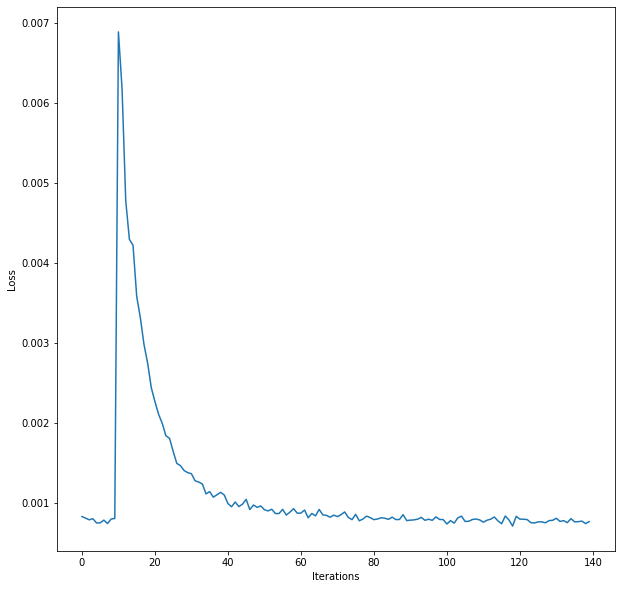

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
myList = loss_val.items()
x, y = zip(*myList) 
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(x, y)
plt.show()

## (d) Inference and Visualization

### Infer HPE using the pretrain model

Infer and evaluate the pretrained 2HG model. Please keep your terminal output in order to get full credit.

In [11]:
os.chdir('/content/pytorch_stacked_hourglass')

In [12]:
!python test.py -c test_run_001

=> loading checkpoint 'exp/test_run_001'
=> loaded checkpoint 'exp/test_run_001' (epoch 6)
100% 300/300 [00:31<00:00,  9.50it/s]
100% 2958/2958 [05:36<00:00,  8.80it/s]
all :
Val PCK @, 0.5 , total : 0.031 , count: 44239
Tra PCK @, 0.5 , total : 0.033 , count: 4443
Val PCK @, 0.5 , ankle : 0.014 , count: 4234
Tra PCK @, 0.5 , ankle : 0.01 , count: 392
Val PCK @, 0.5 , knee : 0.011 , count: 4963
Tra PCK @, 0.5 , knee : 0.026 , count: 499
Val PCK @, 0.5 , hip : 0.029 , count: 5777
Tra PCK @, 0.5 , hip : 0.041 , count: 587
Val PCK @, 0.5 , pelvis : 0.04 , count: 2878
Tra PCK @, 0.5 , pelvis : 0.041 , count: 293
Val PCK @, 0.5 , thorax : 0.055 , count: 2932
Tra PCK @, 0.5 , thorax : 0.037 , count: 298
Val PCK @, 0.5 , neck : 0.022 , count: 2932
Tra PCK @, 0.5 , neck : 0.027 , count: 298
Val PCK @, 0.5 , head : 0.038 , count: 2931
Tra PCK @, 0.5 , head : 0.034 , count: 297
Val PCK @, 0.5 , wrist : 0.034 , count: 5837
Tra PCK @, 0.5 , wrist : 0.032 , count: 589
Val PCK @, 0.5 , elbow : 0.015

In [13]:
!wget http://www-personal.umich.edu/~cnris/original_2hg/checkpoint.pt -P exp/test_run_2HG

--2021-11-30 02:57:24--  http://www-personal.umich.edu/~cnris/original_2hg/checkpoint.pt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86671343 (83M) [text/plain]
Saving to: ‘exp/test_run_2HG/checkpoint.pt’

checkpoint.pt       100%[===================>]  82.66M   395KB/s    in 3m 44s  

2021-11-30 03:01:08 (379 KB/s) - ‘exp/test_run_2HG/checkpoint.pt’ saved [86671343/86671343]



In [14]:
# TODO
!python test.py -c test_run_2HG

=> loading checkpoint 'exp/test_run_2HG'
=> loaded checkpoint 'exp/test_run_2HG' (epoch 201)
100% 300/300 [00:31<00:00,  9.52it/s]
100% 2958/2958 [05:36<00:00,  8.78it/s]
all :
Val PCK @, 0.5 , total : 0.883 , count: 44239
Tra PCK @, 0.5 , total : 0.941 , count: 4443
Val PCK @, 0.5 , ankle : 0.779 , count: 4234
Tra PCK @, 0.5 , ankle : 0.857 , count: 392
Val PCK @, 0.5 , knee : 0.812 , count: 4963
Tra PCK @, 0.5 , knee : 0.914 , count: 499
Val PCK @, 0.5 , hip : 0.874 , count: 5777
Tra PCK @, 0.5 , hip : 0.918 , count: 587
Val PCK @, 0.5 , pelvis : 0.91 , count: 2878
Tra PCK @, 0.5 , pelvis : 0.973 , count: 293
Val PCK @, 0.5 , thorax : 0.98 , count: 2932
Tra PCK @, 0.5 , thorax : 0.997 , count: 298
Val PCK @, 0.5 , neck : 0.975 , count: 2932
Tra PCK @, 0.5 , neck : 0.993 , count: 298
Val PCK @, 0.5 , head : 0.957 , count: 2931
Tra PCK @, 0.5 , head : 0.99 , count: 297
Val PCK @, 0.5 , wrist : 0.82 , count: 5837
Tra PCK @, 0.5 , wrist : 0.898 , count: 589
Val PCK @, 0.5 , elbow : 0.878

Infer and evaluate the pretrained 8HG model. Please keep your terminal output in order to get full credit.

In [15]:
!wget http://www-personal.umich.edu/~cnris/original_8hg/checkpoint.pt -P exp/test_run_8HG

--2021-11-30 03:08:41--  http://www-personal.umich.edu/~cnris/original_8hg/checkpoint.pt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395375425 (377M) [text/plain]
Saving to: ‘exp/test_run_8HG/checkpoint.pt’

checkpoint.pt       100%[===================>] 377.06M   378KB/s    in 16m 54s 

2021-11-30 03:25:36 (381 KB/s) - ‘exp/test_run_8HG/checkpoint.pt’ saved [395375425/395375425]



In [16]:
!python test.py -c test_run_8HG

=> loading checkpoint 'exp/test_run_8HG'
=> loaded checkpoint 'exp/test_run_8HG' (epoch 214)
100% 300/300 [01:10<00:00,  4.27it/s]
100% 2958/2958 [11:48<00:00,  4.18it/s]
all :
Val PCK @, 0.5 , total : 0.902 , count: 44239
Tra PCK @, 0.5 , total : 0.963 , count: 4443
Val PCK @, 0.5 , ankle : 0.808 , count: 4234
Tra PCK @, 0.5 , ankle : 0.903 , count: 392
Val PCK @, 0.5 , knee : 0.846 , count: 4963
Tra PCK @, 0.5 , knee : 0.948 , count: 499
Val PCK @, 0.5 , hip : 0.888 , count: 5777
Tra PCK @, 0.5 , hip : 0.947 , count: 587
Val PCK @, 0.5 , pelvis : 0.926 , count: 2878
Tra PCK @, 0.5 , pelvis : 0.98 , count: 293
Val PCK @, 0.5 , thorax : 0.985 , count: 2932
Tra PCK @, 0.5 , thorax : 0.997 , count: 298
Val PCK @, 0.5 , neck : 0.98 , count: 2932
Tra PCK @, 0.5 , neck : 0.997 , count: 298
Val PCK @, 0.5 , head : 0.965 , count: 2931
Tra PCK @, 0.5 , head : 0.99 , count: 297
Val PCK @, 0.5 , wrist : 0.85 , count: 5837
Tra PCK @, 0.5 , wrist : 0.937 , count: 589
Val PCK @, 0.5 , elbow : 0.903

Visualize some human pose estimation results.

In [ ]:
# TODO

In [52]:
!pip install adjustText

In [53]:
import os
import sys
import copy
from pathlib import Path

import scipy.io
import numpy as np
from tqdm import tqdm
from adjustText import adjust_text
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

In [54]:
os.getcwd()

'/content/pytorch_stacked_hourglass/data'

In [55]:
cd /content/pytorch_stacked_hourglass/data/

/content/pytorch_stacked_hourglass


In [56]:
root = Path(os.getcwd()).parent
sys.path.append(root)


dataset_name = ['MPII']
dataset_path = list(map(lambda x: os.path.join(root, '/content/pytorch_stacked_hourglass/data/', x), dataset_name))

filenames_ = list(map(lambda path, name: open(os.path.join(path, 'filenames.txt'.format(name))), dataset_path, dataset_name))
filenames = list(map(lambda f: f.read().split(), filenames_))
_ = list(map(lambda f: f.close(), filenames_))

In [57]:
def visualize_image(image_info):
    '''
    :param image_info: (dict)
    '''
    colour = {'rankl': (0, 0, 1), 'rknee': (0, 0, 1), 'rhip': (0, 0, 1),
              'lankl': (1, 0, 0), 'lknee': (1, 0, 0), 'lhip': (1, 0, 0),
              'rwri': (1, 1, 0), 'relb': (1, 1, 0), 'rsho': (1, 1, 0),
              'lwri': (0, 1, 0), 'lelb': (0, 1, 0), 'lsho': (0, 1, 0),
              'head': (0, 1, 1), 'thorax': (0, 1, 1), 'upper_neck': (0, 1, 1)}

    os.makedirs(os.path.join(root, 'results', 'viz_gt'), exist_ok=True)
    img_dump = os.path.join(root, 'results', 'viz_gt')

    # Since we're considering only MPII, the outer loop will execute only once.
    for dataset_name_ in image_info.keys():
        # Iterate over all images
        for i in tqdm(range(len(image_info[dataset_name_]['img']))):

            fig, ax = plt.subplots(nrows=1, ncols=1, frameon=False)
            ax.set_axis_off()

            # Load image, gt for the given index
            img = image_info[dataset_name_]['img'][i]
            img_name = image_info[dataset_name_]['img_name'][i]
            img_gt = image_info[dataset_name_]['img_gt'][i]

            # Store joint names which will be displayed on the image
            text_overlay = []
            ax.imshow(img)

            # Color-code the joint and joint name onto the image
            joint_names = list(colour.keys())
            for jnt in joint_names:
                for jnt_gt in img_gt[jnt]:
                    if jnt_gt[2]:
                        text_overlay.append(ax.text(x=jnt_gt[0], y=jnt_gt[1], s=jnt, color=colour[jnt], fontsize=6))
                        ax.add_patch(Circle(jnt_gt[:2], radius=1.5, color=colour[jnt], fill=False))

            # Ensure no crowding of joints on the image
            adjust_text(text_overlay)

            plt.savefig(fname=os.path.join(img_dump, '{}'.format(img_name)),
                        facecolor='black', edgecolor='black', bbox_inches='tight', dpi=300)

            #plt.close()
            del fig, ax

100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


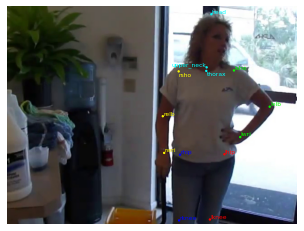

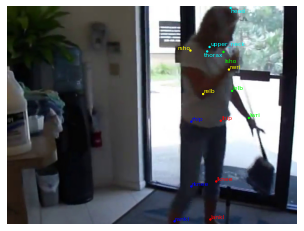

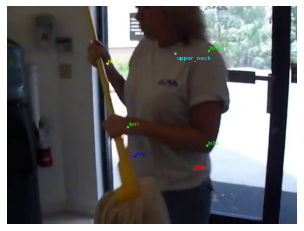

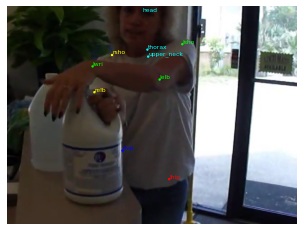

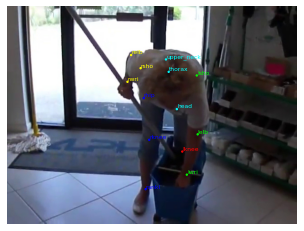

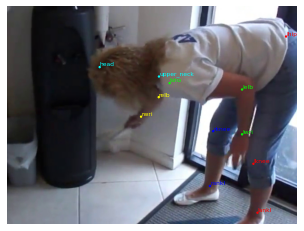

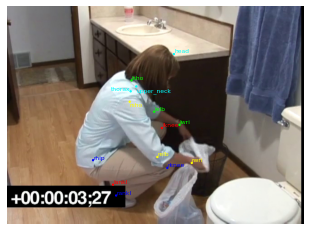

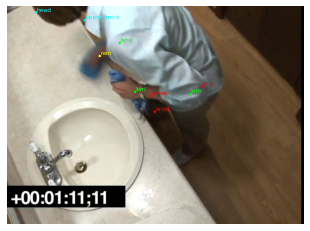

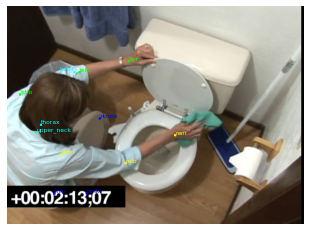

In [59]:
# index to joint name conversion
mpii_idx_to_jnt = {0: 'rankl', 1: 'rknee', 2: 'rhip', 5: 'lankl', 4: 'lknee', 3: 'lhip',
                   6: 'pelvis', 7: 'thorax', 8: 'upper_neck', 11: 'relb', 10: 'rwri', 9: 'head',
                   12: 'rsho', 13: 'lsho', 14: 'lelb', 15: 'lwri'}

# This template will then be updated as and when we read ground truth
mpii_template = dict([(mpii_idx_to_jnt[i], []) for i in range(16)])

# Load the mat file.
matlab_mpii = scipy.io.loadmat(os.path.join(dataset_path[0], 'joints.mat'), struct_as_record=False)['RELEASE'][0, 0]
num_images = annotation_mpii = matlab_mpii.__dict__['annolist'][0].shape[0]

# Load images and GT in batches of 200
initial_index = 50
batch = 5
while initial_index < 60:
    # Initialize empty placeholder
    img_dict = {'mpii': {'img': [], 'img_name': [], 'img_pred': [], 'img_gt': []}}
    
    # Iterate over each image
    for img_idx in tqdm(range(initial_index, min(initial_index + batch, 60))):
        annotation_mpii = matlab_mpii.__dict__['annolist'][0, img_idx]
        train_test_mpii = matlab_mpii.__dict__['img_train'][0, img_idx].flatten()[0]
        person_id = matlab_mpii.__dict__['single_person'][img_idx][0].flatten()

        # Load the individual image. Throw an exception if image corresponding to filename not available.
        img_name = annotation_mpii.__dict__['image'][0, 0].__dict__['name'][0]
        try:
            image = plt.imread(os.path.join(dataset_path[0], 'images', img_name))
        except FileNotFoundError:
            print('Could not load filename: {}'.format(img_name))
            continue

        # Avoid modifying the template and create a copy
        gt_per_image = copy.deepcopy(mpii_template)

        # Flag is set to true if atleast one person exists in the image with joint annotations.
        # If Flag == True, then the image and GT is considered for visualization, else skip
        annotated_person_flag = False
        
        # Iterate over persons
        for person in (person_id - 1):
            try:
                annopoints_img_mpii = annotation_mpii.__dict__['annorect'][0, person].__dict__['annopoints'][0, 0]
                num_joints = annopoints_img_mpii.__dict__['point'][0].shape[0]

                # Iterate over present joints
                for i in range(num_joints):
                    x = annopoints_img_mpii.__dict__['point'][0, i].__dict__['x'].flatten()[0]
                    y = annopoints_img_mpii.__dict__['point'][0, i].__dict__['y'].flatten()[0]
                    id_ = annopoints_img_mpii.__dict__['point'][0, i].__dict__['id'][0][0]
                    vis = annopoints_img_mpii.__dict__['point'][0, i].__dict__['is_visible'].flatten()

                    # No entry corresponding to visible
                    if vis.size == 0:
                        vis = 1
                    else:
                        vis = vis.item()

                    gt_per_joint = np.array([x, y, vis]).astype(np.float16)
                    gt_per_image[mpii_idx_to_jnt[id_]].append(gt_per_joint)

                annotated_person_flag = True
            except KeyError:
                # Person 'x' could not have annotated joints, hence move to person 'y'
                continue

        if not annotated_person_flag:
            continue

        # Update the template copy with image, name and ground truth
        img_dict['mpii']['img'].append(image)
        img_dict['mpii']['img_name'].append(img_name)
        img_dict['mpii']['img_gt'].append(gt_per_image)
    
    visualize_image(img_dict)
    initial_index += batch

### Try customized images

Download some images from the internet and infer and visualize the human pose.

In [65]:
# TODO
root = Path(os.getcwd()).parent
sys.path.append(root)


dataset_name = ['MPII']
dataset_path = list(map(lambda x: os.path.join(root, '/content/pytorch_stacked_hourglass/data/', x), dataset_name))

filenames_ = list(map(lambda path, name: open(os.path.join(path, 'filenames.txt'.format(name))), dataset_path, dataset_name))
filenames = list(map(lambda f: f.read().split(), filenames_))
_ = list(map(lambda f: f.close(), filenames_))

In [66]:
def visualize_image(image_info):
    '''
    :param image_info: (dict)
    '''
    colour = {'rankl': (0, 0, 1), 'rknee': (0, 0, 1), 'rhip': (0, 0, 1),
              'lankl': (1, 0, 0), 'lknee': (1, 0, 0), 'lhip': (1, 0, 0),
              'rwri': (1, 1, 0), 'relb': (1, 1, 0), 'rsho': (1, 1, 0),
              'lwri': (0, 1, 0), 'lelb': (0, 1, 0), 'lsho': (0, 1, 0),
              'head': (0, 1, 1), 'thorax': (0, 1, 1), 'upper_neck': (0, 1, 1)}

    os.makedirs(os.path.join(root, 'results', 'viz_gt'), exist_ok=True)
    img_dump = os.path.join(root, 'results', 'viz_gt')

    # Since we're considering only MPII, the outer loop will execute only once.
    for dataset_name_ in image_info.keys():
        # Iterate over all images
        for i in tqdm(range(len(image_info[dataset_name_]['img']))):

            fig, ax = plt.subplots(nrows=1, ncols=1, frameon=False)
            ax.set_axis_off()

            # Load image, gt for the given index
            img = image_info[dataset_name_]['img'][i]
            img_name = image_info[dataset_name_]['img_name'][i]
            img_gt = image_info[dataset_name_]['img_gt'][i]

            # Store joint names which will be displayed on the image
            text_overlay = []
            ax.imshow(img)

            # Color-code the joint and joint name onto the image
            joint_names = list(colour.keys())
            for jnt in joint_names:
                for jnt_gt in img_gt[jnt]:
                    if jnt_gt[2]:
                        text_overlay.append(ax.text(x=jnt_gt[0], y=jnt_gt[1], s=jnt, color=colour[jnt], fontsize=6))
                        ax.add_patch(Circle(jnt_gt[:2], radius=1.5, color=colour[jnt], fill=False))

            # Ensure no crowding of joints on the image
            adjust_text(text_overlay)

            plt.savefig(fname=os.path.join(img_dump, '{}'.format(img_name)),
                        facecolor='black', edgecolor='black', bbox_inches='tight', dpi=300)

            #plt.close()
            del fig, ax

100%|██████████| 3/3 [00:10<00:00,  3.42s/it]


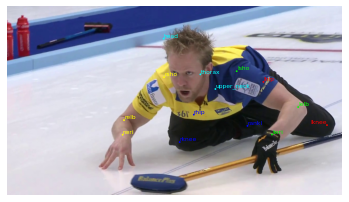

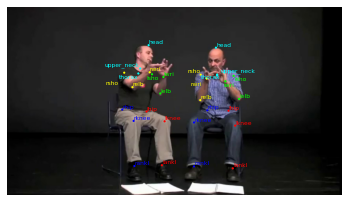

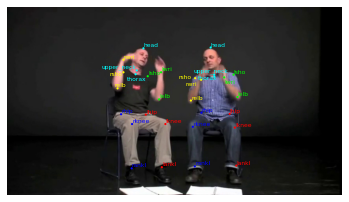

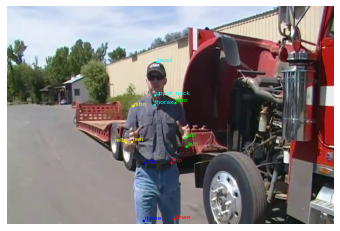

In [67]:
# index to joint name conversion
mpii_idx_to_jnt = {0: 'rankl', 1: 'rknee', 2: 'rhip', 5: 'lankl', 4: 'lknee', 3: 'lhip',
                   6: 'pelvis', 7: 'thorax', 8: 'upper_neck', 11: 'relb', 10: 'rwri', 9: 'head',
                   12: 'rsho', 13: 'lsho', 14: 'lelb', 15: 'lwri'}

# This template will then be updated as and when we read ground truth
mpii_template = dict([(mpii_idx_to_jnt[i], []) for i in range(16)])

# Load the mat file.
matlab_mpii = scipy.io.loadmat(os.path.join(dataset_path[0], 'joints.mat'), struct_as_record=False)['RELEASE'][0, 0]
num_images = annotation_mpii = matlab_mpii.__dict__['annolist'][0].shape[0]

# Load images and GT in batches of 200
initial_index = 10
batch = 5
while initial_index < 20:
    # Initialize empty placeholder
    img_dict = {'mpii': {'img': [], 'img_name': [], 'img_pred': [], 'img_gt': []}}
    
    # Iterate over each image
    for img_idx in tqdm(range(initial_index, min(initial_index + batch, 20))):
        annotation_mpii = matlab_mpii.__dict__['annolist'][0, img_idx]
        train_test_mpii = matlab_mpii.__dict__['img_train'][0, img_idx].flatten()[0]
        person_id = matlab_mpii.__dict__['single_person'][img_idx][0].flatten()

        # Load the individual image. Throw an exception if image corresponding to filename not available.
        img_name = annotation_mpii.__dict__['image'][0, 0].__dict__['name'][0]
        try:
            image = plt.imread(os.path.join(dataset_path[0], 'images', img_name))
        except FileNotFoundError:
            print('Could not load filename: {}'.format(img_name))
            continue

        # Avoid modifying the template and create a copy
        gt_per_image = copy.deepcopy(mpii_template)

        # Flag is set to true if atleast one person exists in the image with joint annotations.
        # If Flag == True, then the image and GT is considered for visualization, else skip
        annotated_person_flag = False
        
        # Iterate over persons
        for person in (person_id - 1):
            try:
                annopoints_img_mpii = annotation_mpii.__dict__['annorect'][0, person].__dict__['annopoints'][0, 0]
                num_joints = annopoints_img_mpii.__dict__['point'][0].shape[0]

                # Iterate over present joints
                for i in range(num_joints):
                    x = annopoints_img_mpii.__dict__['point'][0, i].__dict__['x'].flatten()[0]
                    y = annopoints_img_mpii.__dict__['point'][0, i].__dict__['y'].flatten()[0]
                    id_ = annopoints_img_mpii.__dict__['point'][0, i].__dict__['id'][0][0]
                    vis = annopoints_img_mpii.__dict__['point'][0, i].__dict__['is_visible'].flatten()

                    # No entry corresponding to visible
                    if vis.size == 0:
                        vis = 1
                    else:
                        vis = vis.item()

                    gt_per_joint = np.array([x, y, vis]).astype(np.float16)
                    gt_per_image[mpii_idx_to_jnt[id_]].append(gt_per_joint)

                annotated_person_flag = True
            except KeyError:
                # Person 'x' could not have annotated joints, hence move to person 'y'
                continue

        if not annotated_person_flag:
            continue

        # Update the template copy with image, name and ground truth
        img_dict['mpii']['img'].append(image)
        img_dict['mpii']['img_name'].append(img_name)
        img_dict['mpii']['img_gt'].append(gt_per_image)
    
    visualize_image(img_dict)
    initial_index += batch

## (e) Install VideoPose3D
### Pytorch & Caffe2

In [60]:
!wget https://anaconda.org/pytorch/pytorch/1.2.0/download/linux-64/pytorch-1.2.0-py3.6_cuda10.0.130_cudnn7.6.2_0.tar.bz2
!tar xvjf pytorch-1.2.0-py3.6_cuda10.0.130_cudnn7.6.2_0.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/

# It might take some time

--2021-11-30 05:08:28--  https://anaconda.org/pytorch/pytorch/1.2.0/download/linux-64/pytorch-1.2.0-py3.6_cuda10.0.130_cudnn7.6.2_0.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5d18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5a11922b393ec61208ae9668/5d4c44f5fe6b2a65c4c559c7?response-content-disposition=attachment%3B%20filename%3D%22pytorch-1.2.0-py3.6_cuda10.0.130_cudnn7.6.2_0.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27pytorch-1.2.0-py3.6_cuda10.0.130_cudnn7.6.2_0.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20211130T050828Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEBwaCXVzLWVhc3QtMSJHMEUCIQCr77NxIOOJjHoCTOMQO%2BnKLw83yD11GO1WpWAxVklVdAIgItDfC61%2BVDIADRv07ViN87YOXM5p2rxCAUuBgNP%2Fo3AqgwQI5f%2F%2F%2F%2F%2F%2F%2

### Check if Caffe2 was built


In [61]:
# To check if Caffe2 build was successful
!python -c 'from caffe2.python import core' 2>/dev/null && echo "Success" || echo "Failure"

# To check if Caffe2 GPU build was successful
!python -c 'from caffe2.python import workspace; print(workspace.NumCudaDevices())'

Success
1


In [62]:
# Install COCO Dataset 

!apt-get install python-dev
!pip install cython
!pip install pycocotools
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI && make install

import os
os.environ['COCOAPI'] = ":/content/cocoapi"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 8.84 MiB/s, done.
Resolving deltas: 100% (576/576), done.
# install pycocotools to the Python site-packages
python setup.py build_ext install
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/pytorch_stacked_hourglass/data/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating bui

In [63]:
# Install Detectron

!git clone https://github.com/facebookresearch/detectron
!pip install -r detectron/requirements.txt
!cd detectron && make
!python detectron/detectron/tests/test_spatial_narrow_as_op.py

Cloning into 'detectron'...
remote: Enumerating objects: 1377, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1377 (delta 1), reused 2 (delta 0), pack-reused 1370
Receiving objects: 100% (1377/1377), 4.38 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (825/825), done.
     |████████████████████████████████| 375 kB 4.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-3.12-cp37-cp37m-linux_x86_64.whl size=43073 sha256=9ac14c7e98da15cc651fc96e104f4dc7e951e8a0bdd1636bfaf83c4a8cf82e42
  Stored in directory: /root/.cache/pip/wheels/21/cc/0a/8f691c938b079b07fa17a2e2940e3faae0a3dfb3ff5b3ac356
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythoni

### Install VideoPose3D & Copy Video Script to Detectron Tools Folder

In [64]:
# copy file from VideoPose3d
!git clone https://github.com/facebookresearch/VideoPose3D
!cp VideoPose3D/inference/infer_video.py detectron/tools/infer_video.py

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 12.79 MiB/s, done.
Resolving deltas: 100% (41/41), done.


### Download Pretrained Human3.6m Coco Model

In [ ]:
!mkdir VideoPose3D/checkpoint
os.chdir('VideoPose3D/checkpoint')
!wget https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
os.chdir('../..')

--2021-11-28 23:01:53--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M  18.4MB/s    in 3.7s    

2021-11-28 23:01:58 (17.5 MB/s) - ‘pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]



### Download Youtube Video for 3D Pose Estimation (specify YOUTUBE_ID)

In [ ]:
YOUTUBE_ID ='UpH7rm0cYbM'


!pip install -q youtube-dl
#download video
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID

!mkdir videos   
  
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -ss 00:00:42 -t 00:00:05 videos/video.mp4

     |████████████████████████████████| 1.9 MB 5.1 MB/s 
[youtube] UpH7rm0cYbM: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 11.24MiB in 02:57
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh -

### Example: Compute 2D Coordinates with Detectron

In [ ]:
!mkdir output
!python detectron/tools/infer_video.py \
    --cfg detectron/configs/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_s1x.yaml \
    --output-dir output \
    --image-ext mp4 \
    --wts https://dl.fbaipublicfiles.com/detectron/37698009/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_s1x.yaml.08_45_57.YkrJgP6O/output/train/keypoints_coco_2014_train:keypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl \
   videos

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/37698009/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_s1x.yaml.08_45_57.YkrJgP6O/output/train/keypoints_coco_2014_train:keypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/37698009/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_s1x.ya

### Example: Prepare Detectron Output to fit VideoPose3D Input

In [ ]:
!mkdir ./VideoPose3D/data/detectronoutput
!cp output/video.mp4.npz VideoPose3D/data/detectronoutput/video.mp4.npz
os.chdir('VideoPose3D/data') # This script must be launched from the "data" directory
!python prepare_data_2d_custom.py -i detectronoutput -o myvideos
os.chdir('../../')

Parsing 2D detections from detectronoutput
Processing detectronoutput/video.mp4.npz
120 total frames processed
0 frames were interpolated
----------
Saving...
Done.


### Example: Compute 3D Joints with VideoPose3D

In [ ]:
!cp ./videos/video.mp4 VideoPose3D/video.mp4
os.chdir('VideoPose3D')

!python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject video.mp4 --viz-action custom --viz-camera 0 --viz-video video.mp4 --viz-output output.mp4 --viz-export outputfile --viz-size 6

Namespace(actions='*', architecture='3,3,3,3,3', batch_size=1024, bone_length_term=True, by_subject=False, causal=False, channels=1024, checkpoint='checkpoint', checkpoint_frequency=10, data_augmentation=True, dataset='custom', dense=False, disable_optimizations=False, downsample=1, dropout=0.25, epochs=60, evaluate='pretrained_h36m_detectron_coco.bin', export_training_curves=False, keypoints='myvideos', learning_rate=0.001, linear_projection=False, lr_decay=0.95, no_eval=False, no_proj=False, render=True, resume='', stride=1, subjects_test='S9,S11', subjects_train='S1,S5,S6,S7,S8', subjects_unlabeled='', subset=1, test_time_augmentation=True, viz_action='custom', viz_bitrate=3000, viz_camera=0, viz_downsample=1, viz_export='outputfile', viz_limit=-1, viz_no_ground_truth=False, viz_output='output.mp4', viz_size=6, viz_skip=0, viz_subject='video.mp4', viz_video='video.mp4', warmup=1)
Loading dataset...
Preparing data...
Loading 2D detections...
INFO: Receptive field: 243 frames
INFO: Tr

## (f) Questions

(1) Use the provided video and the pre-trained model of BOTH Stacked Hourglass and Detectron to do the inference and visualize the 2D human pose estimation results.


In [ ]:
# TODO
import numpy as np
data  = np.load('outputfile.npy')
lst = data
for item in lst:
    print(item)

[[-1.81539872e-06 -1.19604501e-05  4.11550758e-07]
 [-1.17856592e-01  5.08475816e-03 -7.80288037e-03]
 [-8.35667104e-02  4.22269881e-01  4.43061367e-02]
 [-6.53599799e-02  8.33696604e-01  1.93255126e-01]
 [ 1.17856339e-01 -5.09120710e-03  7.80597795e-03]
 [ 1.01340085e-01  4.13615108e-01  4.62576486e-02]
 [ 7.69478977e-02  8.22211385e-01  2.04533949e-01]
 [-4.54853708e-03 -2.21318528e-01 -3.43365520e-02]
 [ 2.35788822e-02 -4.67548400e-01 -7.09411651e-02]
 [ 1.09654544e-02 -5.17727196e-01 -1.65770993e-01]
 [ 1.73691250e-02 -6.20964766e-01 -1.20011963e-01]
 [ 1.37482196e-01 -3.92955482e-01 -3.72971892e-02]
 [ 2.15803087e-01 -1.63730606e-01  5.33939339e-02]
 [ 2.30647087e-01 -3.18912566e-02 -1.19889900e-01]
 [-1.01559952e-01 -4.07203972e-01 -5.75361326e-02]
 [-2.15830177e-01 -1.90877378e-01  1.80964693e-02]
 [-1.96742207e-01 -4.41608801e-02 -1.60417646e-01]]
[[-2.09382415e-06 -1.16023148e-05  5.43786996e-07]
 [-1.17680684e-01  4.51674126e-03 -6.60124607e-03]
 [-8.36620182e-02  4.21584785e

In [ ]:
root = Path(os.getcwd()).parent
sys.path.append(root)

dataset_name = ['MPII']
#dataset_path = list(map(lambda x: os.path.join(root, '/content/pytorch_stacked_hourglass/data/', x), dataset_name))
dataset_path = list(map(lambda x: os.path.join(root, 'outputfile.npy', x), dataset_name))
filenames_ = list(map(lambda path, name: open(os.path.join(path, 'filenames.txt'.format(name))), dataset_path, dataset_name))
filenames = list(map(lambda f: f.read().split(), filenames_))
_ = list(map(lambda f: f.close(), filenames_))

In [68]:
root = Path(os.getcwd()).parent
sys.path.append(root)


dataset_name = ['MPII']
dataset_path = list(map(lambda x: os.path.join(root, '/content/pytorch_stacked_hourglass/data/', x), dataset_name))

filenames_ = list(map(lambda path, name: open(os.path.join(path, 'filenames.txt'.format(name))), dataset_path, dataset_name))
filenames = list(map(lambda f: f.read().split(), filenames_))
_ = list(map(lambda f: f.close(), filenames_))

In [69]:
def visualize_image(image_info):
    '''
    :param image_info: (dict)
    '''
    colour = {'rankl': (0, 0, 1), 'rknee': (0, 0, 1), 'rhip': (0, 0, 1),
              'lankl': (1, 0, 0), 'lknee': (1, 0, 0), 'lhip': (1, 0, 0),
              'rwri': (1, 1, 0), 'relb': (1, 1, 0), 'rsho': (1, 1, 0),
              'lwri': (0, 1, 0), 'lelb': (0, 1, 0), 'lsho': (0, 1, 0),
              'head': (0, 1, 1), 'thorax': (0, 1, 1), 'upper_neck': (0, 1, 1)}

    os.makedirs(os.path.join(root, 'results', 'viz_gt'), exist_ok=True)
    img_dump = os.path.join(root, 'results', 'viz_gt')

    # Since we're considering only MPII, the outer loop will execute only once.
    for dataset_name_ in image_info.keys():
        # Iterate over all images
        for i in tqdm(range(len(image_info[dataset_name_]['img']))):

            fig, ax = plt.subplots(nrows=1, ncols=1, frameon=False)
            ax.set_axis_off()

            # Load image, gt for the given index
            img = image_info[dataset_name_]['img'][i]
            img_name = image_info[dataset_name_]['img_name'][i]
            img_gt = image_info[dataset_name_]['img_gt'][i]

            # Store joint names which will be displayed on the image
            text_overlay = []
            ax.imshow(img)

            # Color-code the joint and joint name onto the image
            joint_names = list(colour.keys())
            for jnt in joint_names:
                for jnt_gt in img_gt[jnt]:
                    if jnt_gt[2]:
                        text_overlay.append(ax.text(x=jnt_gt[0], y=jnt_gt[1], s=jnt, color=colour[jnt], fontsize=6))
                        ax.add_patch(Circle(jnt_gt[:2], radius=1.5, color=colour[jnt], fill=False))

            # Ensure no crowding of joints on the image
            adjust_text(text_overlay)

            plt.savefig(fname=os.path.join(img_dump, '{}'.format(img_name)),
                        facecolor='black', edgecolor='black', bbox_inches='tight', dpi=300)

            #plt.close()
            del fig, ax

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


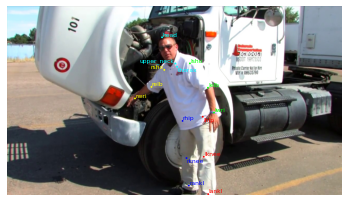

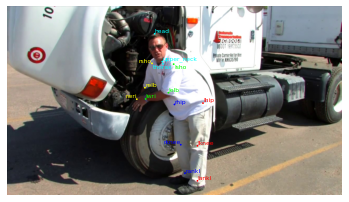

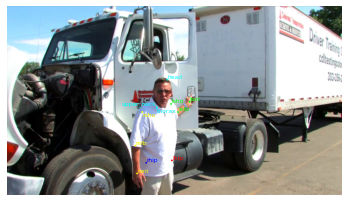

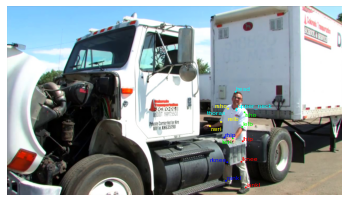

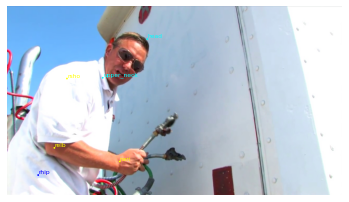

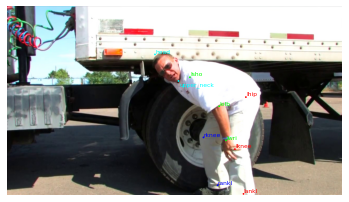

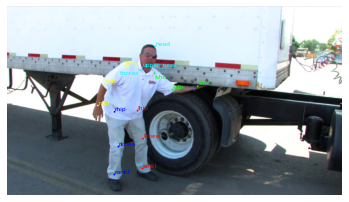

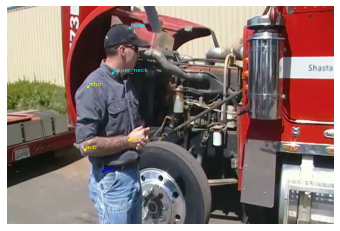

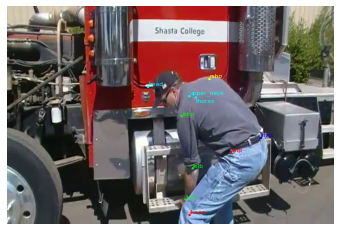

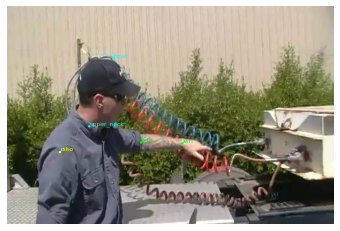

In [70]:
# index to joint name conversion
mpii_idx_to_jnt = {0: 'rankl', 1: 'rknee', 2: 'rhip', 5: 'lankl', 4: 'lknee', 3: 'lhip',
                   6: 'pelvis', 7: 'thorax', 8: 'upper_neck', 11: 'relb', 10: 'rwri', 9: 'head',
                   12: 'rsho', 13: 'lsho', 14: 'lelb', 15: 'lwri'}

# This template will then be updated as and when we read ground truth
mpii_template = dict([(mpii_idx_to_jnt[i], []) for i in range(16)])

# Load the mat file.
matlab_mpii = scipy.io.loadmat(os.path.join(dataset_path[0], 'joints.mat'), struct_as_record=False)['RELEASE'][0, 0]
num_images = annotation_mpii = matlab_mpii.__dict__['annolist'][0].shape[0]

# Load images and GT in batches of 200
initial_index = 30
batch = 5
while initial_index < 40:
    # Initialize empty placeholder
    img_dict = {'mpii': {'img': [], 'img_name': [], 'img_pred': [], 'img_gt': []}}
    
    # Iterate over each image
    for img_idx in tqdm(range(initial_index, min(initial_index + batch, 40))):
        annotation_mpii = matlab_mpii.__dict__['annolist'][0, img_idx]
        train_test_mpii = matlab_mpii.__dict__['img_train'][0, img_idx].flatten()[0]
        person_id = matlab_mpii.__dict__['single_person'][img_idx][0].flatten()

        # Load the individual image. Throw an exception if image corresponding to filename not available.
        img_name = annotation_mpii.__dict__['image'][0, 0].__dict__['name'][0]
        try:
            image = plt.imread(os.path.join(dataset_path[0], 'images', img_name))
        except FileNotFoundError:
            print('Could not load filename: {}'.format(img_name))
            continue

        # Avoid modifying the template and create a copy
        gt_per_image = copy.deepcopy(mpii_template)

        # Flag is set to true if atleast one person exists in the image with joint annotations.
        # If Flag == True, then the image and GT is considered for visualization, else skip
        annotated_person_flag = False
        
        # Iterate over persons
        for person in (person_id - 1):
            try:
                annopoints_img_mpii = annotation_mpii.__dict__['annorect'][0, person].__dict__['annopoints'][0, 0]
                num_joints = annopoints_img_mpii.__dict__['point'][0].shape[0]

                # Iterate over present joints
                for i in range(num_joints):
                    x = annopoints_img_mpii.__dict__['point'][0, i].__dict__['x'].flatten()[0]
                    y = annopoints_img_mpii.__dict__['point'][0, i].__dict__['y'].flatten()[0]
                    id_ = annopoints_img_mpii.__dict__['point'][0, i].__dict__['id'][0][0]
                    vis = annopoints_img_mpii.__dict__['point'][0, i].__dict__['is_visible'].flatten()

                    # No entry corresponding to visible
                    if vis.size == 0:
                        vis = 1
                    else:
                        vis = vis.item()

                    gt_per_joint = np.array([x, y, vis]).astype(np.float16)
                    gt_per_image[mpii_idx_to_jnt[id_]].append(gt_per_joint)

                annotated_person_flag = True
            except KeyError:
                # Person 'x' could not have annotated joints, hence move to person 'y'
                continue

        if not annotated_person_flag:
            continue

        # Update the template copy with image, name and ground truth
        img_dict['mpii']['img'].append(image)
        img_dict['mpii']['img_name'].append(img_name)
        img_dict['mpii']['img_gt'].append(gt_per_image)
    
    visualize_image(img_dict)
    initial_index += batch


(2) Infer the 3D keypoints based on the 2D keypoints results from the two methods in (1). (needs to be displayed in Colab with mp4 format, sample codes and images are given below.)


In [ ]:
# display video
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

(3) Besides the quality of the 2D keypoint detector, what other parameters or model architecture do you think that may affect the 3D performance? Explain why. (e.g., receptive fields, numbers of residual blocks, etc. )


A) The parameters that may affect the 3D performance are as follows:

1. Receptive fields- It depends upon the amount of images that are being processed and the size of the space that produces the features in the given image. With small receptive fields the identification of joints might get missed but it helps in processing slow motion pictures faster.

2. Residual blocks- Increase in residual blocks create more sophisticated feature maps and help in detection of more images.  